<a href="https://colab.research.google.com/github/bkaplowitz/Tax-Smoothing/blob/master/smoothing_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a id='smoothing'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Consumption and Tax Smoothing with Complete and Incomplete Markets


<a id='index-0'></a>

## Contents

- [Consumption and Tax Smoothing with Complete and Incomplete Markets](#Consumption-and-Tax-Smoothing-with-Complete-and-Incomplete-Markets)  
  - [Overview](#Overview)  
  - [Background](#Background)  
  - [Model 1 (Complete Markets)](#Model-1-(Complete-Markets))  
  - [Model 2 (One-Period Risk-Free Debt Only)](#Model-2-(One-Period-Risk-Free-Debt-Only))  
  - [Example: Tax Smoothing with Complete Markets](#Example:-Tax-Smoothing-with-Complete-Markets)  
  - [Linear State Space Version of Complete Markets Model](#Linear-State-Space-Version-of-Complete-Markets-Model)  

In addition to what’s in Anaconda, this lecture will need the  library:

In [1]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in /usr/local/lib/python3.6/dist-packages (0.4.5)


## Overview

This lecture describes two types of consumption-smoothing and tax-smoothing models

- one is in the **complete markets** tradition of Lucas and Stokey [[LS83]](zreferences.ipynb#lucasstokey1983)  
- the other is in the **incomplete markets** tradition  of Hall [[Hal78]](zreferences.ipynb#hall1978) and Barro [[Bar79]](zreferences.ipynb#barro1979)  


*Complete markets* allow a consumer or government to buy or sell claims contingent on all possible states of the world.

*Incomplete markets* allow a consumer or government to buy or sell only a limited set of securities, often only a single risk-free security.

Hall [[Hal78]](zreferences.ipynb#hall1978) and Barro [[Bar79]](zreferences.ipynb#barro1979) both worked in an incomplete markets traditions by assuming
that the only asset that can be traded is a risk-free one period bond.

Hall assumed an exogenous stochastic process of nonfinancial income and
an exogenous gross interest rate on one period risk-free debt that equals
$ \beta^{-1} $, where $ \beta \in (0,1) $ is also a consumer’s
intertemporal discount factor.

Barro [[Bar79]](zreferences.ipynb#barro1979) made an analogous assumption about the risk-free interest
rate in a tax-smoothing model that turns out to have the same mathematical structure as Hall’s
consumption-smoothing model.

To get Barro’s model from Hall’s, all we have to do is to rename variables

We maintain Hall and Barro’s assumption about the interest rate when we describe an
incomplete markets version of our model.

In addition, we extend their assumption about the interest rate to an appropriate counterpart to create a “complete markets” model in the style of
Lucas and Stokey [[LS83]](zreferences.ipynb#lucasstokey1983).

While we are equally interested in consumption-smoothing and tax-smoothing
models, in this lecture  we mostly focus mainly on  consumption-smoothing
versions of these models.

But for each version of a consumption-smoothing model, there is a tax-smoothing counterpart obtained simply by

- relabeling consumption as tax collections  
- relabeling a consumer’s  nonfinancial income as a government’s purchases  
- relabeling a consumer’s *debt* as a government’s *assets*  


For elaborations on this theme, please see [Optimal Savings II: LQ Techniques](perm_income_cons.ipynb#) and later parts of this lecture.

We’ll consider two closely related alternative assumptions about the consumer’s
exogenous nonfinancial income process (or in the tax-smoothing
interpretation, the government’s exogenous expenditure process):

- that it is generated by  a finite $ N $ state Markov chain (setting $ N=2 $ most of the time)  
- that it is described by a linear state space model with a continuous
  state vector in $ {\mathbb R}^n $ driven by a Gaussian vector IID shock
  process  


We’ll spend most of this lecture studying the finite-state Markov specification, but will briefly treat the linear state space specification before concluding.

### Relationship to Other Lectures

This lecture can be viewed as a followup to [Optimal Savings II: LQ Techniques](perm_income_cons.ipynb#) and  a warm-up for a model of tax smoothing described in [Optimal Taxation with State-Contingent Debt](opt_tax_recur.ipynb#).

Linear-quadratic versions of the Lucas-Stokey tax-smoothing model are described in [Optimal Taxation in an LQ Economy](lqramsey.ipynb#).

The key difference between those lectures and this one is

- Here the decision-maker  takes all prices as exogenous, meaning that his decisions do not affect them.  
- In [Optimal Taxation in an LQ Economy](lqramsey.ipynb#) and [Optimal Taxation with State-Contingent Debt](opt_tax_recur.ipynb#), the decision-maker – the government in the case of these lectures – recognizes that its decisions affect prices.  


So these later lectures are partly about how a government  optimally  manipulate prices of government debt, albeit indirectly via the effects that distorting
taxes have on equilibrium prices and allocations

## Background

Outcomes in consumption-smoothing (or tax-smoothing) models emerge from two
sources:

- a decision-maker – a consumer in the consumption-smoothing model or
  a government in the tax-smoothing model – who wants to maximize an
  intertemporal objective function that expresses its preference for
  paths of consumption (or tax collections) that are *smooth* in the
  sense of  varying as little as possible across time and realized Markov states  
- a set of trading opportunities that allow the optimizer to transform
  a possibly erratic nonfinancial income (or government expenditure)
  process into a smoother consumption (or tax collections) process by
  purchasing or selling financial securities  


In the complete markets version of the model, each period the consumer
can buy or sell one-period ahead state-contingent securities whose
payoffs depend on next period’s realization of the Markov state.

In the two-state Markov chain case,  two such securities are traded  each period.

In an $ N $ state Markov state version of the model,  $ N $ such securities are traded each period.

These state-contingent securities are commonly called Arrow securities, after Kenneth Arrow <https://en.wikipedia.org/wiki/Kenneth_Arrow>

In the incomplete markets version of the model, the consumer can buy and sell only one security each period, a risk-free bond with gross return $ \beta^{-1} $.

### Finite State Markov Income Process

In each version of the consumption-smoothing model, nonfinancial income is governed by a two-state Markov chain (it’s easy to generalize this to an $ N $ state Markov chain).

In particular, the *state of the world* is given by $ s_t $ that follows
a Markov chain with transition probability matrix

$$
P_{ij} = \mathbb P \{s_{t+1} = \bar s_j \,|\, s_t = \bar s_i \}
$$

where $ \mathbb P $ means conditional probability

Nonfinancial income $ \{y_t\} $ obeys

$$
y_t =
\begin{cases}
    \bar y_1 & \quad \text{if } s_t = \bar s_1 \\
    \bar y_2 & \quad \text{if } s_t = \bar s_2
\end{cases}
$$

A consumer wishes to maximize


<a id='equation-cs-1'></a>
$$
\mathbb E
\left[
    \sum_{t=0}^\infty \beta^t u(c_t)
\right]
\quad
\text{where} \quad
u(c_t) = - (c_t -\gamma)^2
\quad \text{and} \quad
 0 < \beta < 1 \tag{1}
$$

#### Remark About Isomorphism

We can regard these as tax-smoothing models if we set
$ c_t = T_t $ and $ G_t = y_t $, where $ T_t $ is total tax
collections and $ \{G_t\} $ is an exogenous government expenditures
process.

As mentioned earlier, for much of this lecture we shall focus on the consumption-smoothing interpretation of our models.

### Market Structure

Our complete and incomplete markets models  differ in how effectively the market structure allows a
consumer to transfer resources across time and Markov states, there
being more transfer opportunities in the complete markets setting than
in the incomplete markets setting.

Watch how these differences in opportunities affect

- how smooth consumption is across time and Markov states  
- how the consumer chooses to make his levels of indebtedness behave
  over time and across Markov states  

## Model 1 (Complete Markets)

At each date $ t \geq 0 $, the consumer trades **one-period ahead
Arrow securities**.

We assume that prices of these securities are exogenous to the consumer
(or in the tax-smoothing version of the model, to the government).

*Exogenous* means that they are unaffected by the  decision-maker.

In Markov state $ s_t $ at time $ t $, one unit of consumption
in state $ s_{t+1} $ at time $ t+1 $ costs $ q(s_{t+1} \,|\, s_t) $ units of the time $ t $ consumption good.

At time $ t=0 $, the consumer starts with an inherited level of debt
due at time $ 0 $ of $ b_0 $ units of time $ 0 $ consumption
goods.

The consumer’s budget constraint at $ t \geq 0 $ in Markov
state $ s_t $ is


<a id='equation-cs-budget1'></a>
$$
c_t + b_t
\leq y(s_t) +
\sum_j  q(\bar s_j \,|\, s_t ) \, b_{t+1}(\bar s_j \,|\, s_t) \tag{2}
$$

where $ b_t $ is the consumer’s one-period debt that falls due at time $ t $ and  $ b_{t+1}(\bar s_j\,|\, s_t) $ are the consumer’s time
$ t $ sales of the  time $ t+1 $ consumption good in Markov state $ \bar s_j $, a source of time $ t $ revenues.

An analog of Hall’s assumption that the one-period risk-free gross
interest rate is $ \beta^{-1} $ is


<a id='equation-cs-2'></a>
$$
q(\bar s_j \,|\, \bar s_i) = \beta P_{ij} \tag{3}
$$

To understand this, observe that in state $ \bar s_i $ it costs $ \sum_j q(\bar s_j \,|\, \bar s_i) $  to purchase one unit of consumption next period *for sure*, i.e., meaning no matter what state of the world  occurs at $ t+1 $.

Hence the implied price of a risk-free claim on one unit of consumption next
period is

$$
\sum_j q(\bar s_j \,|\, \bar s_i) =  \sum_j \beta P_{ij} =  \beta
$$

This confirms that [(3)](#equation-cs-2) is a natural extension of Hall’s assumption about the
risk-free one-period interest rate.

First-order necessary conditions for maximizing the consumer’s expected utility subject to the sequence of budget constraints [(2)](#equation-cs-budget1) are

$$
\beta \frac{u'(c_{t+1})}{u'(c_t) } \mathbb P\{s_{t+1}\,|\, s_t \}
    = q(s_{t+1} \,|\, s_t)
$$

or, under our assumption [(3)](#equation-cs-2) about the values taken by  Arrow security prices,


<a id='equation-cs-3'></a>
$$
c_{t+1} = c_t \tag{4}
$$

Thus, our consumer sets $ c_t = \bar c $ for all $ t \geq 0 $ for some value $ \bar c $ that it is our job now to determine.

We’ll use a *guess and verify* method

**Guess:** We’ll make the plausible guess that


<a id='equation-eq-guess'></a>
$$
b_{t+1}(\bar s_j \,|\, s_t = \bar s_i) = b(\bar s_j) ,
        \quad i=1,2; \;\; j= 1,2 \tag{5}
$$

so that the amount borrowed today turns out to depend only on *tomorrow’s* Markov state. (Why is this is a plausible guess?)

To determine $ \bar c $, we shall pursue the implications of the consumer’s budget constraints in each Markov state today and  our guess [(5)](#equation-eq-guess) about the consumer’s debt level choices.

For $ t \geq 1 $, these imply


<a id='equation-cs-4a'></a>
$$
\begin{aligned}
    \bar c + b(\bar s_1) & = y(\bar s_1) + q(\bar s_1\,|\, \bar s_1) b(\bar s_1) + q(\bar s_2 \,|\, \bar s_1)  b(\bar s_2) \cr
    \bar c + b(\bar s_2) & = y(\bar s_2) + q(\bar s_1\,|\, \bar s_2) b(\bar s_1) + q(\bar s_2 \,|\, \bar s_2) b(\bar s_2)
\end{aligned} \tag{6}
$$

or

$$
\begin{bmatrix}
   b(\bar s_1) \cr b(\bar s_2)
\end{bmatrix} +
\begin{bmatrix}
\bar c \cr \bar c
\end{bmatrix} =
\begin{bmatrix}
    y(\bar s_1) \cr y(\bar s_2)
\end{bmatrix} +
\beta
\begin{bmatrix}
    P_{11} & P_{12} \cr P_{21} & P_{22}
\end{bmatrix}
\begin{bmatrix}
    b(\bar s_1) \cr b(\bar s_2)
\end{bmatrix}
$$

These are $ 2 $ equations in the $ 3 $ unknowns
$ \bar c, b(\bar s_1), b(\bar s_2) $.

To get a third equation, we assume that at time $ t=0 $, $ b_0 $
is the debt due; and we assume that at time $ t=0 $, the Markov
state is $ \bar s_1 $.

Then the budget constraint at time $ t=0 $ is


<a id='equation-cs-5'></a>
$$
\bar c + b_0 = y(\bar s_1) + q(\bar s_1 \,|\, \bar s_1) b(\bar s_1) + q(\bar s_2\,|\,\bar s_1) b(\bar s_2) \tag{7}
$$

If we substitute  [(7)](#equation-cs-5) into the first equation of [(6)](#equation-cs-4a) and rearrange, we
discover that


<a id='equation-cs-6'></a>
$$
b(\bar s_1) = b_0 \tag{8}
$$

We can then use the second equation of [(6)](#equation-cs-4a)  to deduce the restriction


<a id='equation-cs-7'></a>
$$
y(\bar s_1) - y(\bar s_2) + [q(\bar s_1\,|\, \bar s_1) - q(\bar s_1\,|\, \bar s_2) - 1 ] b_0 +
[q(\bar s_2\,|\,\bar s_1) + 1 - q(\bar s_2 \,|\, \bar s_2) ] b(\bar s_2) = 0 , \tag{9}
$$

an equation in the unknown $ b(\bar s_2) $.

Knowing $ b(\bar s_1) $ and $ b(\bar s_2) $, we can solve equation [(7)](#equation-cs-5)  for the constant level of consumption $ \bar c $.

### Key Outcomes

The preceding calculations indicate that in the complete markets version
of our model, we obtain the following striking results:

- The consumer chooses to make consumption perfectly constant across
  time and Markov states.  


We computed the constant level of consumption $ \bar c $ and indicated how that level depends on the underlying specifications of preferences, Arrow securities prices,  the stochastic process of exogenous nonfinancial income, and the initial debt level $ b_0 $

- The consumer’s debt neither accumulates, nor decumulates, nor drifts –
  instead, the debt level each period is an exact function of the Markov
  state, so in the two-state Markov case, it switches between two
  values.  
- We have verified guess [(5)](#equation-eq-guess).  


We computed how one of those debt levels depends entirely on initial debt – it equals it – and how the other value depends on virtually all  remaining parameters of the model.

### Code

Here’s some code that, among other things, contains a function called consumption_complete().

This function computes $ b(\bar s_1), b(\bar s_2), \bar c $ as outcomes given a set of parameters, under the assumption of complete markets

In [0]:
import numpy as np
import quantecon as qe
import scipy.linalg as la


class ConsumptionProblem:
    """
    The data for a consumption problem, including some default values.
    """

    def __init__(self,
                 β=.96,
                 y=[2, 1.5,3],
                 b0=3,
                 P=np.asarray([[.8, .1, .1],
                               [.2, .6,.2],
                               [.3,.4,.3]])):
        """

        Parameters
        ----------

        β : discount factor
        P : n x n transition matrix
        y : list containing the n income levels
        b0 : debt in period 0 (= state_1 debt level)

        """
        self.β = β
        self.y = y
        self.b0 = b0
        self.P = P
        self.n = np.size(y)

def consumption_complete(cp):
    """
    Computes endogenous values for the complete market case.

    Parameters
    ----------

    cp : instance of ConsumptionProblem

    Returns
    -------

        c_bar : constant consumption
        b: vector of debts in each state

    associated with the price system 

        Q = β * P

    """

    β, P, y, b0, n = cp.β, cp.P, cp.y, cp.b0, cp.n   # Unpack
    b=np.zeros(np.shape(y))
    #b[0] = b0                               # b(s1) is known to be equal to b0
    Q = β * P                               # assumed price system
    
    # Using equation (7-9) calculate b2, where we will stack the time 0 equation
    # on top of our existing n equations. Our new y variable will represent all 
    # net income, with the top being y(s_1)-b_0
    # our new b variable will be called X and will capture all choice variables
    # with the first entry being c_bar.
    # X= [c_bar; b]
    # G  [1 0 0 0 0 0...; 
    #     1 1 ........;
    #     1 0 1 ...]
    #E.g [1_vec, 0 ;
    #              I]
    #G@X = [y(s_1)-b_0;Y_VEC]+Q_new (left entry is all 0's now)@np.asarray(X) 
    #c_bar = y(s_1)+Q[0,:]@np.asarray(b)-b_0
    # (G-Q_new)@X=[y(s_1)-b_0;Y_VEC]
    # X= (G-Q_new)^{-1}@[y(s_1)-b_0;Y_VEC]
    G = np.block([ #represents the fact that we don't observe b and c_bar seperately, only b(s_j)+c_bar on LHS
                  [1,np.zeros((1,n))],
                  [np.ones((n,1)), np.eye(n)]
                  ])
    y_aug= np.concatenate((np.atleast_2d(y[1]-b0),np.atleast_2d(y).T)) #construct our new y, state variables
    Q_aug = np.block([ #construct our new Q matrix that involves both the time 0 prices (same as state 1) and prices for all other states
                  [0,Q[0,:]],
                  [np.zeros((n,1)),Q]                
    ])
    X = np.linalg.inv((G-Q_aug)) @ y_aug # solve for X using the linear algebra calculations above.
    c_bar=X[0,:] #unroll solved for x
    b = X[1:n+1,:]
    return c_bar, b


def consumption_incomplete(cp, N_simul=150):
    """
    Computes endogenous values for the incomplete market case.

    Parameters
    ----------

    cp : instance of ConsumptionProblem
    N_simul : int

    """

    β, P, y, b0 = cp.β, cp.P, cp.y, cp.b0  # Unpack
    # For the simulation define a quantecon MC class
    mc = qe.MarkovChain(P)

    # Useful variables
    y = np.asarray(y).reshape(n, 1)
    v = np.linalg.inv(np.eye(n) - β * P) @ y

    # Simulat state path
    s_path = mc.simulate(N_simul, init=0)

    # Store consumption and debt path
    b_path, c_path = np.ones(N_simul + 1), np.ones(N_simul)
    b_path[0] = b0

    # Optimal decisions from (12) and (13)
    db = ((1 - β) * v - y) / β

    for i, s in enumerate(s_path):
        c_path[i] = (1 - β) * (v - b_path[i] * np.ones((np.size(y), 1)))[s, 0]
        b_path[i + 1] = b_path[i] + db[s, 0]

    return c_path, b_path[:-1], y[s_path], s_path

Let’s test by checking that $ \bar c $ and $ b_2 $ satisfy the budget constraint

In [3]:
cp = ConsumptionProblem()
c_bar, b = consumption_complete(cp)
debt_complete = np.asarray(b)
np.isclose(c_bar + b[1] - cp.y[1] - (cp.β * cp.P)[1, :] @ debt_complete, 0)

[[1.87663134]
 [3.5       ]
 [2.71531061]
 [4.4579325 ]]


array([ True])

Below, we’ll take the outcomes produced by this code – in particular the implied
consumption and debt paths – and compare them with outcomes
from an incomplete markets model in the spirit of Hall [[Hal78]](zreferences.ipynb#hall1978) and Barro [[Bar79]](zreferences.ipynb#barro1979) (and also, for those who love history, Gallatin (1807) [[Gal37]](zreferences.ipynb#gallatin)).

## Model 2 (One-Period Risk-Free Debt Only)

This is a version of the original models of Hall (1978) and Barro (1979)
in which the decision-maker’s ability to substitute intertemporally is
constrained by his ability to buy or sell only one security, a risk-free
one-period bond bearing a constant gross interest rate that equals
$ \beta^{-1} $.

Given an initial debt  $ b_0 $ at time $ 0 $, the
consumer faces a sequence of budget constraints

$$
c_t + b_t = y_t + \beta b_{t+1}, \quad t \geq 0
$$

where $ \beta $ is the price at time $ t $ of a risk-free claim
on one unit of time consumption at time $ t+1 $.

First-order conditions for the consumer’s  problem are

$$
\sum_{j} u'(c_{t+1,j}) P_{ij} = u'(c_{t, i})
$$

For our assumed quadratic utility function this implies


<a id='equation-cs-8'></a>
$$
\sum_j c_{t+1,j} P_{ij} = c_{t,i} \tag{10}
$$

which is Hall’s (1978) conclusion that consumption follows a random walk.

As we saw in our first lecture on the [permanent income model](perm_income.ipynb#), this leads to


<a id='equation-cs-9'></a>
$$
b_t = \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j} - (1 -\beta)^{-1} c_t \tag{11}
$$

and


<a id='equation-cs-10'></a>
$$
c_t = (1-\beta)
    \left[
        \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j} - b_t
    \right] \tag{12}
$$

Equation [(12)](#equation-cs-10) expresses $ c_t $ as a net interest rate factor $ 1 - \beta $ times the sum
of the expected present value of nonfinancial income $ \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j} $ and financial wealth $ -b_t $.

Substituting [(12)](#equation-cs-10)  into the one-period budget constraint and rearranging leads to


<a id='equation-cs-11'></a>
$$
b_{t+1} - b_t
= \beta^{-1} \left[ (1-\beta)
\mathbb E_t \sum_{j=0}^\infty\beta^j y_{t+j} - y_t    \right] \tag{13}
$$

Now let’s do a useful calculation that will yield a convenient expression for the key term $ \mathbb E_t \sum_{j=0}^\infty\beta^j y_{t+j} $ in our finite Markov chain setting.

Define

$$
v_t := \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j}
$$

In our two-state Markov chain setting, $ v_t = v(1) $ when $ s_t= \bar s_1 $ and $ v_t = v(2) $ when $ s_t=\bar s_2 $.

Therefore, we can write

$$
\begin{aligned}
    v(1) & = y(1) + \beta P_{11} v(1) + \beta P_{12} v(2)
    \\
    v(2) & = y(2) + \beta P_{21} v(1) + \beta P_{22} v(2)
\end{aligned}
$$

or

$$
\vec v = \vec y + \beta P \vec v
$$

where  $ \vec v =    \begin{bmatrix} v(1) \cr v(2) \end{bmatrix} $ and  $ \vec y =  \begin{bmatrix} y(1) \cr y(2) \end{bmatrix} $.

We can also write the last expression as

$$
\vec v = (I - \beta P)^{-1} \vec y
$$

In our finite Markov chain setting, from expression  [(12)](#equation-cs-10),  consumption at date $ t $ when debt is $ b_t $ and the Markov state today is $ s_t = i $ is evidently


<a id='equation-cs-12'></a>
$$
c(b_t, i) =  (1 - \beta) \left( [(I - \beta P)^{-1} \vec y]_i - b_t \right) \tag{14}
$$

and the increment in debt is


<a id='equation-cs-13'></a>
$$
b_{t+1} - b_t = \beta^{-1} [ (1- \beta) v(i) - y(i) ] \tag{15}
$$

### Summary of Outcomes

In contrast to outcomes in the complete markets model, in the incomplete
markets model

- consumption drifts over time as a random walk; the level of
  consumption at time $ t $ depends on the level of debt that the
  consumer brings into the period as well as the expected discounted
  present value of nonfinancial income at $ t $.  
- the consumer’s debt drifts upward over time in response to low
  realizations of nonfinancial income and drifts downward over time in
  response to high realizations of nonfinancial income.  
- the drift over time in the consumer’s debt and the dependence of
  current consumption on today’s debt level account for the drift over
  time in consumption.  

### The Incomplete Markets Model

The code above also contains a function called consumption_incomplete() that uses [(14)](#equation-cs-12) and [(15)](#equation-cs-13) to

- simulate paths of $ y_t, c_t, b_{t+1} $  
- plot these against values of $ \bar c, b(s_1), b(s_2) $ found in a corresponding  complete markets economy  


Let’s try this, using the same parameters in both complete and incomplete markets economies

[[1.87663134]
 [3.5       ]
 [2.71531061]
 [4.4579325 ]]


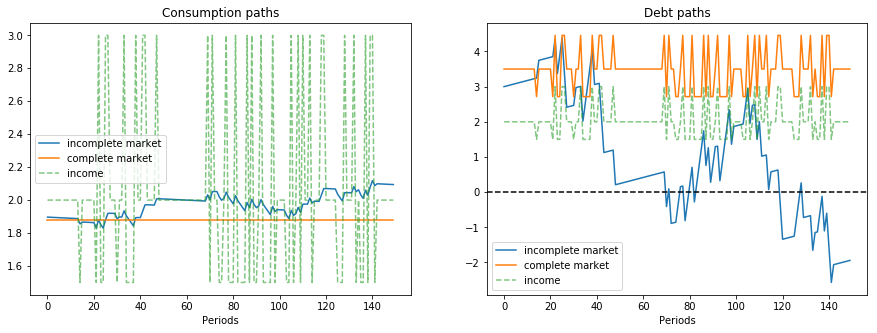

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
N_simul = 150
cp = ConsumptionProblem()
n=cp.n
c_bar, b= consumption_complete(cp)
debt_complete = np.asarray(b)

c_path, debt_path, y_path, s_path = consumption_incomplete(cp, N_simul=N_simul)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Consumption paths')
ax[0].plot(np.arange(N_simul), c_path, label='incomplete market')
ax[0].plot(np.arange(N_simul), c_bar * np.ones(N_simul), label='complete market')
ax[0].plot(np.arange(N_simul), y_path, label='income', alpha=.6, ls='--')
ax[0].legend()
ax[0].set_xlabel('Periods')

ax[1].set_title('Debt paths')
ax[1].plot(np.arange(N_simul), debt_path, label='incomplete market')
ax[1].plot(np.arange(N_simul), debt_complete[s_path], label='complete market')
ax[1].plot(np.arange(N_simul), y_path, label='income', alpha=.6, ls='--')
ax[1].legend()
ax[1].axhline(0, color='k', ls='--')
ax[1].set_xlabel('Periods')

plt.show()

In the graph on the left, for the same sample path of nonfinancial
income $ y_t $, notice that

- consumption is constant when there are complete markets, but  takes a random walk in the incomplete markets version of the model.  
- the consumer’s debt oscillates between two values that are functions
  of the Markov state in the complete markets model, while the
  consumer’s debt drifts in a “unit root” fashion in the incomplete
  markets economy.  

#### Relabeling Variables to get tax-smoothing interpretations

We can simply relabel variables to acquire tax-smoothing interpretations of our two models

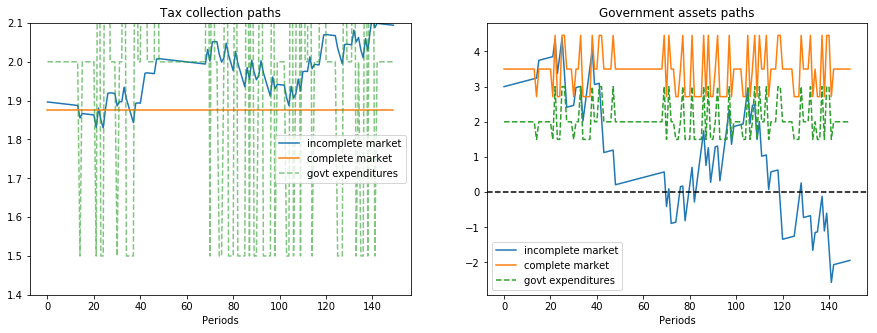

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Tax collection paths')
ax[0].plot(np.arange(N_simul), c_path, label='incomplete market')
ax[0].plot(np.arange(N_simul), c_bar * np.ones(N_simul), label='complete market')
ax[0].plot(np.arange(N_simul), y_path, label='govt expenditures', alpha=.6, ls='--')
ax[0].legend()
ax[0].set_xlabel('Periods')
ax[0].set_ylim([1.4, 2.1])

ax[1].set_title('Government assets paths')
ax[1].plot(np.arange(N_simul), debt_path, label='incomplete market')
ax[1].plot(np.arange(N_simul), debt_complete[s_path], label='complete market')
ax[1].plot(np.arange(N_simul), y_path, label='govt expenditures', ls='--')
ax[1].legend()
ax[1].axhline(0, color='k', ls='--')
ax[1].set_xlabel('Periods')

plt.show()

## Example: Tax Smoothing with Complete Markets

It is instructive  to focus on a simple tax-smoothing example with complete markets.

This example will illustrate how, in a complete markets model like that of Lucas and Stokey [[LS83]](zreferences.ipynb#lucasstokey1983), the government purchases
insurance from the private sector.

> - Purchasing insurance  protects the government against having to  raise taxes too high or issue too much debt in  high government expenditure events.  



We assume that government expenditures take one of two values $ G_1 < G_2 $, where Markov state $ 1 $ means “peace” and Markov state $ 2 $ means “war”.

The government budget constraint in Markov state $ i $ is

$$
T_i + b_i = G_i + \sum_j Q_{ij} b_j
$$

where

$$
Q_{ij} = \beta P_{ij}
$$

is the price of one unit of goods next period in state $ j $ when
today’s Markov state is $ i $ and $ b_i $ is the government’s
level of *assets* in Markov state $ i $.

That is, $ b_i $ equals  one-period loans owed to the government that fall due at time $ t $.

As above, we’ll assume that the initial Markov state is state $ 1 $.

In addition, to simplify our example, we’ll set the government’s initial
asset level to $ 0 $, so that $ b_1 =0 $.

Here’s our code to compute a quantitative example with zero debt in peace time:

In [9]:
# Parameters

β = .96
y = [1, 2]
b0 = 0
P = np.asarray([[.8, .2],
                [.4, .6]])

cp = ConsumptionProblem(β, y, b0, P)
Q = β * P
N_simul = 150

c_bar, b = consumption_complete(cp)
b1,b2= b[0],b[1]
debt_complete = np.asarray([b1, b2])

print(f"P \n {P}")
print(f"Q \n {Q}")
print(f"Govt expenditures in peace and war = {y}")
print(f"Constant tax collections = {c_bar}")
print(f"Govt assets in two states = {debt_complete}")

msg = """
Now let's check the government's budget constraint in peace and war.
Our assumptions imply that the government always purchases 0 units of the
Arrow peace security.
"""
print(msg)

AS1 = Q[0, 1] * b1
print(f"Spending on Arrow war security in peace = {AS1}")
AS2 = Q[1, 1] * b2
print(f"Spending on Arrow war security in war = {AS2}")

print("\n")
print("Government tax collections plus asset levels in peace and war")
TB1 = c_bar + b1
print(f"T+b in peace = {TB1}")
TB2 = c_bar + b2
print(f"T+b in war = {TB2}")

print("\n")
print("Total government spending in peace and war")
G1 = y[0] + AS1
G2 = y[1] + AS2
print(f"Peace = {G1}")
print(f"War = {G2}")

print("\n")
print("Let's see ex-post and ex-ante returns on Arrow securities")

Π = np.reciprocal(Q)
exret = Π
print(f"Ex-post returns to purchase of Arrow securities = {exret}")
exant = Π * P
print(f"Ex-ante returns to purchase of Arrow securities {exant}")

[[ 1.35168831]
 [-1.        ]
 [ 0.62337662]]
P 
 [[0.8 0.2]
 [0.4 0.6]]
Q 
 [[0.768 0.192]
 [0.384 0.576]]
Govt expenditures in peace and war = [1, 2]
Constant tax collections = [1.35168831]
Govt assets in two states = [[-1.        ]
 [ 0.62337662]]

Now let's check the government's budget constraint in peace and war.
Our assumptions imply that the government always purchases 0 units of the
Arrow peace security.

Spending on Arrow war security in peace = [-0.192]
Spending on Arrow war security in war = [0.35906494]


Government tax collections plus asset levels in peace and war
T+b in peace = [0.35168831]
T+b in war = [1.97506494]


Total government spending in peace and war
Peace = [0.808]
War = [2.35906494]


Let's see ex-post and ex-ante returns on Arrow securities
Ex-post returns to purchase of Arrow securities = [[1.30208333 5.20833333]
 [2.60416667 1.73611111]]
Ex-ante returns to purchase of Arrow securities [[1.04166667 1.04166667]
 [1.04166667 1.04166667]]


### Explanation

In this example, the government always purchase $ 0 $ units of the
Arrow security that pays off in peace time (Markov state $ 1 $).

But it purchases a positive amount of the security that pays off in war
time (Markov state $ 2 $).

We recommend plugging the quantities computed above into the government
budget constraints in the two Markov states and staring.

This is an example in which

- during peacetime, the government purchases *insurance* against the possibility that war breaks  
- during wartime, the government purchases *insurance* against the possibility that war continues another period  
- the insurance does not pay off so long as peace continues  
- the insurance pays off when war breaks out or continues  


*Exercise:* try changing the Markov transition matrix so that

$$
P = \begin{bmatrix}
        1 & 0 \\
       .2 & .8
    \end{bmatrix}
$$

Also, start the system in Markov state $ 2 $ (war) with initial
government assets $ - 10 $, so that the government starts the
war in debt and $ b_2 = -10 $.

## Linear State Space Version of Complete Markets Model

Now we’ll use a setting like that in the [first lecture on the permanent income model](perm_income.ipynb#).

In that model, there are

- incomplete markets: the consumer can trade only a single risk-free one-period bond bearing gross one-period risk-free interest rate equal to $ \beta^{-1} $.  
- the consumer’s exogenous nonfinancial income is governed by a linear state space model driven by Gaussian shocks, the kind of model studied in an earlier lecture about [linear state space models](linear_models.ipynb#).  


We’ll write down a complete markets counterpart of that model.

Suppose that nonfinancial income is governed by the state
space system

$$
\begin{aligned}
     x_{t+1} & = A x_t + C w_{t+1} \cr
     y_t & = S_y x_t
\end{aligned}
$$

where $ x_t $ is an $ n \times 1 $ vector and $ w_{t+1} \sim {\cal N}(0,I) $ is IID over time.

Again, as a counterpart of the Hall-Barro assumption that the risk-free
gross interest rate is $ \beta^{-1} $, we assume the scaled prices
of one-period ahead Arrow securities are


<a id='equation-cs-14'></a>
$$
p_{t+1}(x_{t+1} \,|\, x_t) = \beta \phi(x_{t+1} \,|\, A x_t, CC') \tag{16}
$$

where $ \phi(\cdot \,|\, \mu, \Sigma) $ is a multivariate Gaussian
distribution with mean vector $ \mu $ and covariance matrix
$ \Sigma $.

Let $ b(x_{t+1}) $ be a vector of state-contingent debt due at $ t+1 $
as a function of the $ t+1 $ state $ x_{t+1} $.

Using the pricing function assumed in [(16)](#equation-cs-14), the value at
$ t $ of $ b(x_{t+1}) $ is

$$
\beta \int b(x_{t+1}) \phi(x_{t+1} \,|\, A x_t, CC') d x_{t+1} = \beta  \mathbb E_t b_{t+1}
$$

In the complete markets setting, the consumer faces a sequence of budget
constraints

$$
c_t + b_t = y_t + \beta \mathbb E_t b_{t+1}, \quad t \geq 0
$$

Please note that

$$
E_t b_{t+1} = \int p_{t+1}(x_{t+1} | x_t) b_{t+1}(x_{t+1}) d x_{t+1}
$$

which verifies that $ E_t b_{t+1} $ is the value of time $ t+1 $ state-contingent claims issued by the consumer at time $ t $

We can solve the time $ t $ budget constraint forward to obtain

$$
b_t = \mathbb E_t  \sum_{j=0}^\infty \beta^j (y_{t+j} - c_{t+j} )
$$

We assume as before that the consumer cares about the expected value
of

$$
\sum_{t=0}^\infty \beta^t u(c_t), \quad 0 < \beta < 1
$$

In the incomplete markets version of the model, we assumed that
$ u(c_t) = - (c_t -\gamma)^2 $, so that the above utility functional
became

$$
-\sum_{t=0}^\infty \beta^t ( c_t - \gamma)^2, \quad 0 < \beta < 1
$$

But in the complete markets version, it is tractable to assume a more general utility function that satisfies $ u' > 0 $ and $ u'' < 0 $.

The first-order condition for the consumer’s problem with complete
markets and our assumption about Arrow securities prices is

$$
u'(c_{t+1}) = u'(c_t) \quad \text{for all }  t\geq 0
$$

which again implies $ c_t = \bar c $ for some $ \bar c $.

So it follows that

$$
b_t = \mathbb E_t \sum_{j=0}^\infty \beta^j (y_{t+j} - \bar c)
$$

or


<a id='equation-cs-15'></a>
$$
b_t = S_y (I - \beta A)^{-1} x_t - \frac{1}{1-\beta} \bar c \tag{17}
$$

where the value of $ \bar c $ satisfies


<a id='equation-cs-16'></a>
$$
\bar b_0 = S_y (I - \beta A)^{-1} x_0 - \frac{1}{1 - \beta } \bar c \tag{18}
$$

where $ \bar b_0 $ is an initial level of the consumer’s debt, specified
as a parameter of the problem.

Thus, in the complete markets version of the consumption-smoothing
model, $ c_t = \bar c, \forall t \geq 0 $ is determined by [(18)](#equation-cs-16)
and the consumer’s debt is a fixed function of
the state $ x_t $ described by [(17)](#equation-cs-15).

Here’s an example that shows how in this setting the availability of insurance against fluctuating nonfinancial income
allows the consumer completely to smooth consumption across time and across states of the world

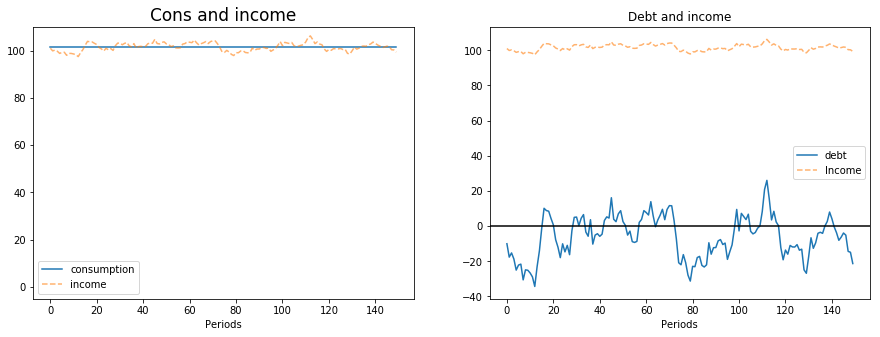

In [10]:
def complete_ss(β, b0, x0, A, C, S_y, T=12):
    """
    Computes the path of consumption and debt for the previously described
    complete markets model where exogenous income follows a linear
    state space
    """
    # Create a linear state space for simulation purposes
    # This adds "b" as a state to the linear state space system
    # so that setting the seed places shocks in same place for
    # both the complete and incomplete markets economy
    # Atilde = np.vstack([np.hstack([A, np.zeros((A.shape[0], 1))]),
    #                   np.zeros((1, A.shape[1] + 1))])
    # Ctilde = np.vstack([C, np.zeros((1, 1))])
    # S_ytilde = np.hstack([S_y, np.zeros((1, 1))])

    lss = qe.LinearStateSpace(A, C, S_y, mu_0=x0)

    # Add extra state to initial condition
    # x0 = np.hstack([x0, np.zeros(1)])

    # Compute the (I - β * A)^{-1}
    rm = la.inv(np.eye(A.shape[0]) - β * A)

    # Constant level of consumption
    cbar = (1 - β) * (S_y @ rm @ x0 - b0)
    c_hist = np.ones(T) * cbar

    # Debt
    x_hist, y_hist = lss.simulate(T)
    b_hist = np.squeeze(S_y @ rm @ x_hist - cbar / (1 - β))


    return c_hist, b_hist, np.squeeze(y_hist), x_hist


# Define parameters
N_simul = 150
α, ρ1, ρ2 = 10.0, 0.9, 0.0
σ = 1.0

A = np.array([[1., 0., 0.],
              [α,  ρ1, ρ2],
              [0., 1., 0.]])
C = np.array([[0.], [σ], [0.]])
S_y = np.array([[1,  1.0, 0.]])
β, b0 = 0.95, -10.0
x0 = np.array([1.0, α / (1 - ρ1), α / (1 - ρ1)])

# Do simulation for complete markets
s = np.random.randint(0, 10000)
np.random.seed(s)  # Seeds get set the same for both economies
out = complete_ss(β, b0, x0, A, C, S_y, 150)
c_hist_com, b_hist_com, y_hist_com, x_hist_com = out

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Consumption plots
ax[0].set_title('Cons and income', fontsize=17)
ax[0].plot(np.arange(N_simul), c_hist_com, label='consumption')
ax[0].plot(np.arange(N_simul), y_hist_com, label='income', alpha=.6, linestyle='--')
ax[0].legend()
ax[0].set_xlabel('Periods')
ax[0].set_ylim([-5.0, 110])

# Debt plots
ax[1].set_title('Debt and income')
ax[1].plot(np.arange(N_simul), b_hist_com, label='debt')
ax[1].plot(np.arange(N_simul), y_hist_com, label='Income', alpha=.6, linestyle='--')
ax[1].legend()
ax[1].axhline(0, color='k')
ax[1].set_xlabel('Periods')

plt.show()

### Interpretation of Graph

In the above graph, please note that:

- nonfinancial income fluctuates in a stationary manner.  
- consumption is completely constant.  
- the consumer’s debt fluctuates in a stationary manner; in fact, in
  this case, because nonfinancial income is a first-order
  autoregressive process, the consumer’s debt is an exact affine function
  (meaning linear plus a constant) of the consumer’s nonfinancial
  income.  

### Tax-smoothing interpretation

In the tax-smoothing interpretation of the preceding  complete markets consumption-smoothing model,  a government  faces a sequence of budget
constraints

$$
T_t + b_t = g_t + \beta \mathbb E_t b_{t+1}, \quad t \geq 0
$$

where $ T_t $ is tax revenues, $ b_t $ are receipts at $ t $ from contingent claims that the government had *purchased* at time $ t $,
and

$$
\mathbb E_t b_{t+1} \equiv \int p_{t+1}(x_{t+1} | x_t) b_{t+1}(x_{t+1}) d x_{t+1}
$$

is the value of time $ t+1 $ state-contingent claims purchased  by the government  at time $ t $

As above with the consumption-smoothing model, we can solve the time $ t $ budget constraint forward to obtain

$$
b_t = \mathbb E_t  \sum_{j=0}^\infty \beta^j (g_{t+j} - T_{t+j} )
$$

which can be rearranged to become

$$
\mathbb E_t  \sum_{j=0}^\infty \beta^j g_{t+j}  = b_t + \sum_{j=0}^\infty \beta^j T_{t+j}
$$

which states that the present value of government purchases equals the value of government assets at $ t $ plus the present value tax receipts

### Incomplete Markets Version

The incomplete markets version of the model with nonfinancial income being governed by a linear state space system
is described in the first lecture on the [permanent income model](perm_income.ipynb#) and the followup
lecture on  the [permanent income model](perm_income_cons.ipynb#).

In that version, consumption follows a random walk and the consumer’s debt follows a process with a unit root.

We leave it to the reader to apply the usual isomorphism to deduce the corresponding implications for a tax-smoothing model like Barro’s [[Bar79]](zreferences.ipynb#barro1979).

### Government Manipulation of Arrow Securities Prices

In [optimal taxation in an LQ economy](lqramsey.ipynb#) and [recursive optimal taxation](opt_tax_recur.ipynb#), we study **complete-markets**
models in which the government recognizes that it can manipulate  Arrow securities prices.

In [optimal taxation with incomplete markets](amss.ipynb#), we study an **incomplete-markets** model in which the government  manipulates asset prices.